# Analise dos dados do covid 19 para a cidade de Belo Jardim-PE

  Esse trabalho foi realizado para disciplina de cálculo numérico com o objetivo de aperfeiçoar os conhecimentos 
  na disciplina. Para isso, nesse projeto  foi realizado:

   - A média móvel em um intervalo de 7 dias
   - A análise da curva ideal para com a função A + Bx + Cx^2 a partir do método dos minimos quadrados
   - O cálculo do erro do ajuste
   - O cálculo do erro relativo a partir de uma previsão. 

 ### primeiros passos
   Ao obter os dados do covid com o link: https://covid.saude.gov.br/, foi necessario uma mesclagem, pois os dados estavam separados em 2 partes<br>
   Para realizar as operações de manipulação de tabela e realizar operações matematicas com o mesmo, foi utilizado 2 bibliotecas: pandas e numpy.

In [1]:
import pandas as pd
import numpy as np

tabela_1 = pd.read_csv("covid09ago2022-p1.csv", sep=";")
tabela_2 = pd.read_csv("covid09ago2022-p2.csv", sep=";")
tabela = pd.merge(tabela_1, tabela_2, how = 'outer')

<br>
  <strong>Agora com a tabela pronta para manipulação, o proximo passo foi reestruturar essa tabela apenas com os dados que serão utilizados</strong>
 <br>
 <br>

In [2]:
tabela_mask = tabela["municipio"] == "Belo Jardim"
tabela_bl = tabela[tabela_mask]
tabela_bl = tabela_bl.iloc[ : , [ 1, 2, 13, 7, 11, 10]].reset_index( drop = True).set_index('data')
display(tabela_bl)

,estado,municipio,obitosNovos,casosNovos,casosAcumulado
data,,,,,
2022-01-01,PE,Belo Jardim,0,0,4674.0
2022-01-02,PE,Belo Jardim,0,0,4674.0
2022-01-03,PE,Belo Jardim,0,0,4674.0
2022-01-04,PE,Belo Jardim,0,1,4675.0
2022-01-05,PE,Belo Jardim,0,4,4679.0
...,...,...,...,...,...
2022-08-05,PE,Belo Jardim,0,1,10044.0
2022-08-06,PE,Belo Jardim,0,0,10044.0
2022-08-07,PE,Belo Jardim,0,0,10044.0


 - ### Média movel e seu grafico respectivo
 <br>
     Nessa celula, os valores dos casos novos foram armazenados separadamente, para o calculo
     da média móvel. Onde o primeiro 'for' indica e inicio e o final dos dados que quero coletar e o segundo 'for'
     para realizar a média dentro dos valores desejados, retornando isso em uma nova lista de dados

In [3]:
casos = tabela_bl['casosNovos'].values.astype(int)
media_casos = []
for x in range(6, casos.size):
    sum = 0
    for i in range( x-6, x + 1):
        sum += casos[i]
    
    media_casos.append(sum / float(7))
    

In [4]:
tabela_bl_media = tabela_bl.iloc[ 6 : , [ 3]]
tabela_bl_media['mediaMovel'] = media_casos
#tabela_bl_media = tabela_bl_media.drop(columns=['casosNovos'])
display(tabela_bl_media)


,casosNovos,mediaMovel
data,,
2022-01-07,1,1.000000
2022-01-08,2,1.285714
2022-01-09,2,1.571429
2022-01-10,0,1.571429
2022-01-11,2,1.714286
...,...,...
2022-08-05,1,1.142857
2022-08-06,0,0.714286
2022-08-07,0,0.571429


<AxesSubplot:xlabel='data'>

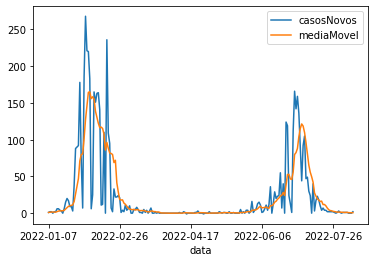

In [5]:
tabela_bl_media.plot()

 ## Método dos minimos quadrados 
   <br>
   Sistema resolvido com eliminação de Gauss

In [7]:
def create_matrix(x):
    matrix = np.empty((0, 3), float)
    matrix = np.append(matrix, np.array([[21, x.sum(), (x**2).sum()]]), axis=0)
    matrix = np.append(matrix, np.array([[x.sum(), (x**2).sum(), (x**2).sum()]]), axis=0)
    matrix = np.append(matrix, np.array([[(x**2).sum(), (x**3).sum(), (x**4).sum()]]), axis=0)
    return matrix

def create_yValues_for_matrix(y, x):
    matrix_result = np.empty((0, 3), int)
    matrix_result = np.append(matrix_result, np.array([y.sum(), (x*y).sum(), ((x**2)*y).sum()]))
    return matrix_result

def gauss_method(matrix, results):
    alpha_values = np.empty((0, 3), float)
    m2_1 = matrix[1][0] / matrix[0][0]
    m3_1 = matrix[2][0] / matrix[0][0]
    matrix[1] = matrix[1] - (m2_1 * matrix[0])
    matrix[2] = matrix[2] - (m3_1 * matrix[0])
    results[1] = results[1] - (m2_1 * results[0])
    results[2] = results[2] - (m3_1 * results[0])
    #print(matrix)
                             
tabela_MQ = tabela_bl.iloc[  : ,  4]
casos_confirmados = tabela_MQ.values.astype(int)
a1 = []
a2 = []
a3 = []
erro = []
previsao = []
erro_previ = []

sum = 0
for x in range(21, casos_confirmados.size):
    sum +=1
    x_values = np.empty((0, 20), int)
    y_values = np.empty((0, 20), int)
    for i in range( x-21, x+1):
        x_values = np.append(x_values, i)
        y_values = np.append(y_values, casos_confirmados[i])     
    matrix = create_matrix(x_values)
    matrix_result = create_yValues_for_matrix(y_values, x_values)
    gauss_method(matrix, matrix_result)
print("saiu")

OverflowError: Python int too large to convert to C long

In [11]:
xs = np.empty((0,3), int)
xy = np.array([1,2,3])
for i in range(3):
    xs = np.append(xs, i)
   

print(xs.dot(xs))

    

5
